In [2]:
# This algorithm deals with only 1 independent variable - Time
# Set of observations taken over a regualar interval of time
# It is used to predict future values based on past/previous values
# Cannot use when values are constant over a period of time
# Stationary data i.e- constant mean, constant variance and autocovariance-> should not depend on time

In [3]:
# Two Types tests to check stationarity of data
# 1. Moving average or variance (more of a visual test)
#2. Hypothesis testing by various test - T,F etc..

In [4]:
# ARIMA Model to work on time series data
# combination of 2 parts
# AR (Auto Regressive) + MA (Moving Average)

In [5]:
#  Example - To forecast the female birth in a state

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
f_birth = pd.read_csv("C:\\Users\\sameer\\Desktop\\Datasets\\daily-total-female-births-CA.csv", delimiter = ',',index_col = 'date',parse_dates = [0])
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [8]:
f_birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [9]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [10]:
# After Data exploration or manipulation, checking for error and redundancy -> convert the data frame in to a data series or 
# an array

In [11]:
type(f_birth)

pandas.core.frame.DataFrame

In [12]:
series_value = f_birth.values
series_value

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [13]:
type(series_value)

numpy.ndarray

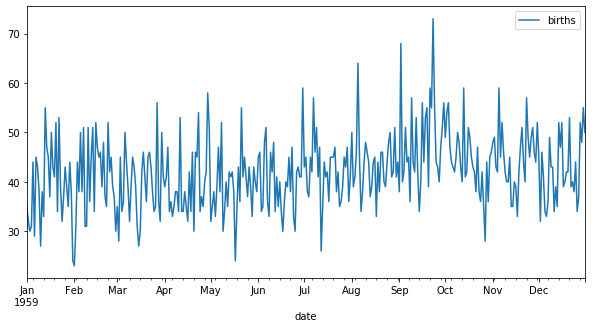

In [14]:
f_birth.plot(figsize = (10,5)) # Series seems to be stationary with no trends

In [15]:
# Smoothing the series
# With the help of Moving Average (taking average of first 'n' observation becomes the first point in the graph)

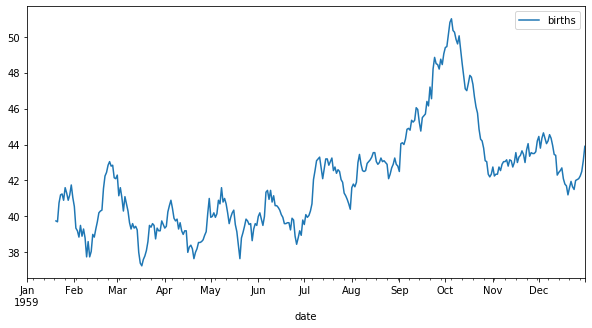

In [16]:
f_birth_mean = f_birth.rolling(window = 20).mean() # 20 observations mean would become first point in the graph
f_birth_mean.plot(figsize = (10,5))

In [17]:
value = pd.DataFrame(series_value) #'shift function is in pandas, so need to convert series or array into dataframe

In [18]:
# To calculate the future value, the next value is dependent on the previous value
# concats to series - series1 and series 1+1 (1st value of first series goes diagonally 1st value of second series)
birth_df = pd.concat([value,value.shift(1)],axis = 1) 
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [19]:
birth_df.columns = ['Actual_Birth','Forecast_Birth'] # Forecast depends on previous observation
birth_df.head()

,Actual_Birth,Forecast_Birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [20]:
from sklearn.metrics import mean_squared_error # to find the error in the database

In [21]:
birth_test = birth_df[1:]
birth_test.head()

,Actual_Birth,Forecast_Birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [22]:
birth_error = mean_squared_error(birth_test.Actual_Birth,birth_test.Forecast_Birth)
birth_error

84.22252747252747

In [23]:
np.sqrt(birth_error) # +/- of 9 births per day error with this basic model -> minimize this

9.177283229394606

In [24]:
# ARIMA MODEL (p,d,q)
# Autoregressive(p) Integrated(d) Moving Average(q)
# Autoregressive -> Previous value correlated to the next value
# Integrated -> Order of difference (level at which correlation b/w observation becomes insignificant)
# Moving Average -> Smoothing of the curve

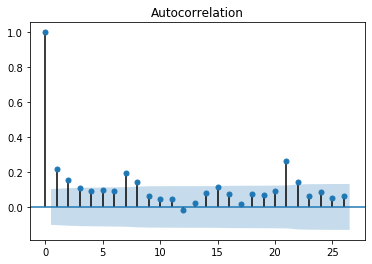

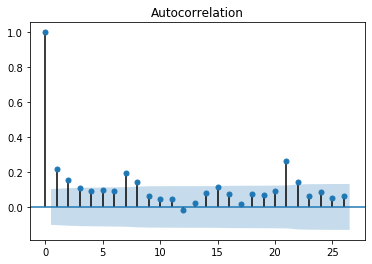

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# plot_acf is to identify parameter 'q'
plot_acf(f_birth) #Shaded portion shows insignificance of correlation b/w observation

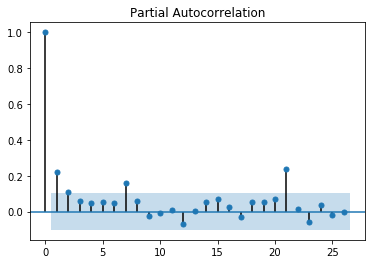

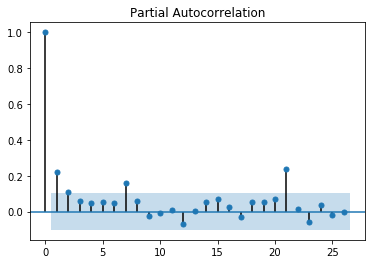

In [26]:
# plot_acf is to identify parameter 'p'
plot_pacf(f_birth)

In [27]:
# p =2,3,  d = 1 (some sort of trend in the observations), q = 3,4
f_birth.size

365

In [28]:
# Train and Test split
birth_train = f_birth[0:330]
birth_test = f_birth[330:365]
birth_train.size

330

In [29]:
birth_test.size

35

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
birth_model = ARIMA(birth_train, order = (2,1,3))
birth_model_fit= birth_model.fit()

C:\Users\sameer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\sameer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [32]:
birth_model_fit.aic # aic - akaike information criterion ->lesser the value, better the model 
# experiment with the order to reduce

2230.948253362418

In [33]:
birth_forecast = birth_model_fit.forecast(steps = 35)[0]
birth_forecast

array([45.30360413, 46.31051172, 43.64950272, 44.59216545, 46.49692823,
       44.34348243, 44.08985685, 46.34378931, 45.0753105 , 43.88109094,
       45.95207005, 45.69569767, 43.97400714, 45.45670698, 46.10369034,
       44.31135089, 44.99233691, 46.26011402, 44.79343816, 44.66476241,
       46.18567875, 45.30633206, 44.53325546, 45.94668385, 45.74838806,
       44.60566478, 45.63340678, 46.0498018 , 44.84524938, 45.33697339,
       46.18216602, 45.18584908, 45.12987121, 46.15765895, 45.55079341])

In [34]:
birth_test

,births
date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [35]:
np.sqrt(mean_squared_error(birth_test,birth_forecast)) # +/- 6 error in female birth per day

6.859968149061197

In [36]:
# Data Transformation Techniques (to check whether it enhance model results)

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
f_birth = pd.read_csv("C:\\Users\\sameer\\Desktop\\Datasets\\daily-total-female-births-CA.csv",index_col = [0],parse_dates = [0])
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [41]:
f_birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


# Normalization (why?)-
# 1. If your data is on different scales
# 2. Because some algorithms works better when data is normalized

In [42]:
# Normalization = (x - min value)/(max value - min value)
f_birth.min()

births    23
dtype: int64

In [43]:
f_birth.max()

births    73
dtype: int64

In [44]:
(37 - 23)/(73-23) # Eg

0.28

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
birth_arr = f_birth.values # making a series or array from data frame to perfrom operations

In [47]:
birth_arr

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [48]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler = scaler.fit(birth_arr)

In [49]:
scaler.data_min_

array([23.])

In [50]:
scaler.data_max_

array([73.])

In [51]:
birth_normalize = scaler.transform(birth_arr)

In [52]:
birth_normalize[0]

array([0.24])

In [53]:
birth_normalize[45]

array([0.58])

In [54]:
for i in range(5):
    print(birth_normalize[i])

[0.24]
[0.18]
[0.14]
[0.16]
[0.42]


In [55]:
# Train Test Split
birth_train = birth_normalize[0:330]
birth_test = birth_normalize[330:365]

In [56]:
from statsmodels.tsa.arima_model import ARIMA

In [57]:
birth_model = ARIMA(birth_train,order = (2,1,3))

In [58]:
 birth_model_fit = birth_model.fit()

In [59]:
birth_model_fit.aic

-343.16289073616747

In [60]:
birth_forecast = birth_model_fit.forecast(steps = 35)[0]
birth_forecast

array([0.44606346, 0.46620536, 0.41298569, 0.43183533, 0.46993237,
       0.42686521, 0.42178998, 0.46686879, 0.44150121, 0.41761534,
       0.45903414, 0.45390821, 0.41947399, 0.44912697, 0.46206741,
       0.42622081, 0.43983982, 0.46519547, 0.43586223, 0.43328851,
       0.46370663, 0.44611969, 0.43065835, 0.45892679, 0.45496046,
       0.4321063 , 0.45266137, 0.46098857, 0.43689759, 0.44673274,
       0.46363588, 0.44370916, 0.44259056, 0.46314591, 0.4510077 ])

In [61]:
birth_test

array([[0.56],
       [0.46],
       [0.42],
       [0.58],
       [0.44],
       [0.18],
       [0.46],
       [0.36],
       [0.22],
       [0.2 ],
       [0.26],
       [0.52],
       [0.4 ],
       [0.4 ],
       [0.22],
       [0.32],
       [0.24],
       [0.58],
       [0.48],
       [0.58],
       [0.32],
       [0.34],
       [0.38],
       [0.38],
       [0.6 ],
       [0.32],
       [0.34],
       [0.3 ],
       [0.42],
       [0.22],
       [0.28],
       [0.58],
       [0.5 ],
       [0.64],
       [0.54]])

In [62]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [63]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

0.1371974819897651

In [64]:
# converting the forecast and test values back to their original range

In [65]:
birth_forecast_reshape = birth_forecast.reshape(len(birth_forecast),1)
birth_forecast_reverse = scaler.inverse_transform(birth_forecast_reshape)

In [66]:
birth_forecast_reverse

array([[45.30317282],
       [46.31026782],
       [43.64928451],
       [44.59176632],
       [46.49661833],
       [44.34326061],
       [44.08949921],
       [46.34343963],
       [45.07506062],
       [43.88076692],
       [45.95170684],
       [45.69541061],
       [43.97369925],
       [45.45634873],
       [46.10337039],
       [44.31104038],
       [44.99199085],
       [46.25977351],
       [44.79311158],
       [44.66442528],
       [46.1853315 ],
       [45.30598455],
       [44.53291747],
       [45.94633974],
       [45.74802314],
       [44.60531483],
       [45.63306869],
       [46.04942838],
       [44.84487966],
       [45.33663714],
       [46.18179413],
       [45.18545783],
       [45.12952793],
       [46.15729567],
       [45.55038523]])

In [67]:
birth_test_reshape = birth_test.reshape(len(birth_test),1)
birth_test_reverse = scaler.inverse_transform(birth_test_reshape)

In [68]:
birth_test_reverse

array([[51.],
       [46.],
       [44.],
       [52.],
       [45.],
       [32.],
       [46.],
       [41.],
       [34.],
       [33.],
       [36.],
       [49.],
       [43.],
       [43.],
       [34.],
       [39.],
       [35.],
       [52.],
       [47.],
       [52.],
       [39.],
       [40.],
       [42.],
       [42.],
       [53.],
       [39.],
       [40.],
       [38.],
       [44.],
       [34.],
       [37.],
       [52.],
       [48.],
       [55.],
       [50.]])

In [69]:
np.sqrt(mean_squared_error(birth_test_reverse,birth_forecast_reverse)) 
# Error is little less but not considerable after normalization

6.8598740994882546

# Standardization 
# data should be normally distributed or gaussian distribution
# (x - mean)/ standard deviation

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
std_scaler = StandardScaler()
std_scaler = std_scaler.fit(birth_arr)

In [72]:
std_scaler.mean_

array([41.98082192])

In [73]:
std_scaler.var_

array([53.84894727])

In [74]:
std_birth = std_scaler.transform(birth_arr)
std_birth[0]

array([-0.95130099])

In [75]:
for i in range(5):
    print(std_birth[i])

[-0.95130099]
[-1.36012148]
[-1.63266846]
[-1.49639497]
[0.27516045]


In [76]:
# Train Test Split
std_birth_train = std_birth[0:330]
std_birth_test = std_birth[330:365]

In [77]:
std_birth_arima = ARIMA(std_birth_train,order=(2,1,3))
std_birth_arima_fit = std_birth_arima.fit()

In [78]:
std_birth_arima_fit.aic

919.4940851001691

In [79]:
std_birth_forecast = std_birth_arima_fit.forecast(steps = 35)[0]

In [80]:
std_birth_forecast

array([0.45280868, 0.59003571, 0.22738146, 0.35584871, 0.61543926,
       0.32195923, 0.2873904 , 0.59456632, 0.42169487, 0.25893792,
       0.54117853, 0.50624233, 0.27160043, 0.47366598, 0.56184314,
       0.3175747 , 0.41037783, 0.58315854, 0.38327503, 0.36573343,
       0.57301127, 0.45317329, 0.34781053, 0.54043725, 0.5134168 ,
       0.35767854, 0.49774017, 0.55449234, 0.39032989, 0.45733927,
       0.57252867, 0.43674767, 0.42911347, 0.56918578, 0.48648267])

In [81]:
std_birth_test

array([[ 1.22907491],
       [ 0.54770744],
       [ 0.27516045],
       [ 1.3653484 ],
       [ 0.41143395],
       [-1.36012148],
       [ 0.54770744],
       [-0.13366003],
       [-1.08757449],
       [-1.22384798],
       [-0.8150275 ],
       [ 0.95652792],
       [ 0.13888696],
       [ 0.13888696],
       [-1.08757449],
       [-0.40620702],
       [-0.95130099],
       [ 1.3653484 ],
       [ 0.68398093],
       [ 1.3653484 ],
       [-0.40620702],
       [-0.26993352],
       [ 0.00261346],
       [ 0.00261346],
       [ 1.5016219 ],
       [-0.40620702],
       [-0.26993352],
       [-0.54248051],
       [ 0.27516045],
       [-1.08757449],
       [-0.67875401],
       [ 1.3653484 ],
       [ 0.82025443],
       [ 1.77416889],
       [ 1.09280142]])

In [82]:
std_birth_forecast_reshape = std_birth_forecast.reshape(len(std_birth_forecast),1)
std_birth_forecast_reverse = std_scaler.inverse_transform(std_birth_forecast_reshape)

In [83]:
std_birth_forecast_reverse

array([[45.30361539],
       [46.31061267],
       [43.64938897],
       [44.5921053 ],
       [46.49702858],
       [44.34341804],
       [44.08974558],
       [46.3438591 ],
       [45.07529656],
       [43.8809561 ],
       [45.95208964],
       [45.6957214 ],
       [43.97387587],
       [45.45667012],
       [46.10373034],
       [44.31124357],
       [44.99225005],
       [46.26014668],
       [44.79336465],
       [44.66464122],
       [46.18568417],
       [45.306291  ],
       [44.53311966],
       [45.94664997],
       [45.74836895],
       [44.6055329 ],
       [45.63333099],
       [46.04978886],
       [44.84513456],
       [45.33686172],
       [46.18214273],
       [45.18575679],
       [45.12973562],
       [46.15761203],
       [45.55072135]])

In [84]:
std_birth_test_reshape = std_birth_test.reshape(len(std_birth_test),1)
std_birth_test_reverse = std_scaler.inverse_transform(std_birth_test_reshape)

In [85]:
std_birth_test_reverse

array([[51.],
       [46.],
       [44.],
       [52.],
       [45.],
       [32.],
       [46.],
       [41.],
       [34.],
       [33.],
       [36.],
       [49.],
       [43.],
       [43.],
       [34.],
       [39.],
       [35.],
       [52.],
       [47.],
       [52.],
       [39.],
       [40.],
       [42.],
       [42.],
       [53.],
       [39.],
       [40.],
       [38.],
       [44.],
       [34.],
       [37.],
       [52.],
       [48.],
       [55.],
       [50.]])

In [86]:
np.sqrt(mean_squared_error(std_birth_test_reverse,std_birth_forecast_reverse))
# Standardization and normalization are almost the same so processes were not impactful

6.859955523596517

# Feature Engineering 
# Not enough variables in the data sets
# Making more variables to improve dataset and improve time series model
# Create Lag variable to see correlation between data points
# Create Moving Average or rolling mean

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
f_birth = pd.read_csv("C:\\Users\\sameer\\Desktop\\Datasets\\daily-total-female-births-CA.csv",index_col=[0],parse_dates=[0],nrows=365)
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [89]:
f_birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [90]:
f_birth['lag1'] = f_birth['births'].shift(1) # created an additional variable with '1' lag
f_birth.head()

,births,lag1
date,,
1959-01-01,35,NaN
1959-01-02,32,35.0
1959-01-03,30,32.0
1959-01-04,31,30.0
1959-01-05,44,31.0


In [91]:
f_birth['lag2'] = f_birth['births'].shift(2)
f_birth.head()

,births,lag1,lag2
date,,,
1959-01-01,35,NaN,NaN
1959-01-02,32,35.0,NaN
1959-01-03,30,32.0,35.0
1959-01-04,31,30.0,32.0
1959-01-05,44,31.0,30.0


In [92]:
f_birth['lag3'] = f_birth['births'].shift(3)
f_birth.head() # We converted it from linear variable to multivariable

,births,lag1,lag2,lag3
date,,,,
1959-01-01,35,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN
1959-01-03,30,32.0,35.0,NaN
1959-01-04,31,30.0,32.0,35.0
1959-01-05,44,31.0,30.0,32.0


In [93]:
f_birth['MA3'] = f_birth['births'].rolling(window = 3).mean() # makes the mean of first '3' values as the first point
f_birth.head()

,births,lag1,lag2,lag3,MA3
date,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333
1959-01-04,31,30.0,32.0,35.0,31.000000
1959-01-05,44,31.0,30.0,32.0,35.000000


In [94]:
f_birth['MA4'] = f_birth['births'].rolling(window = 4).mean()
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4
date,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25


In [95]:
f_birth['MA5'] = f_birth['births'].rolling(window = 5).mean()
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MA5
date,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4


In [96]:
f_birth['Max_5'] = f_birth['births'].rolling(window = 5).max() # created an additional variable having max value of first '5'
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MA5,Max_5
date,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4,44.0


In [97]:
f_birth['Min_5'] = f_birth['births'].rolling(window = 5).min() # created an additional variable having min value of first '5'
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MA5,Max_5,Min_5
date,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN,NaN
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN,NaN
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4,44.0,30.0


In [98]:
f_birth['day'] = f_birth.index.day # made an additional variable using the day in the date after using 'parse_dates' in pd.read
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MA5,Max_5,Min_5,day
date,,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN,NaN,3
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN,NaN,4
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4,44.0,30.0,5


In [99]:
f_birth['month'] = f_birth.index.month
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MA5,Max_5,Min_5,day,month
date,,,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN,NaN,3,1
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN,NaN,4,1
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4,44.0,30.0,5,1


In [100]:
f_birth['year'] = f_birth.index.year
f_birth.head()

,births,lag1,lag2,lag3,MA3,MA4,MA5,Max_5,Min_5,day,month,year
date,,,,,,,,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1959
1959-01-02,32,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1959
1959-01-03,30,32.0,35.0,NaN,32.333333,NaN,NaN,NaN,NaN,3,1,1959
1959-01-04,31,30.0,32.0,35.0,31.000000,32.00,NaN,NaN,NaN,4,1,1959
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4,44.0,30.0,5,1,1959


In [101]:
f_birth.dropna()

,births,lag1,lag2,lag3,MA3,MA4,MA5,Max_5,Min_5,day,month,year
date,,,,,,,,,,,,
1959-01-05,44,31.0,30.0,32.0,35.000000,34.25,34.4,44.0,30.0,5,1,1959
1959-01-06,29,44.0,31.0,30.0,34.666667,33.50,33.2,44.0,29.0,6,1,1959
1959-01-07,45,29.0,44.0,31.0,39.333333,37.25,35.8,45.0,29.0,7,1,1959
1959-01-08,43,45.0,29.0,44.0,39.000000,40.25,38.4,45.0,29.0,8,1,1959
1959-01-09,38,43.0,45.0,29.0,42.000000,38.75,39.8,45.0,29.0,9,1,1959
1959-01-10,27,38.0,43.0,45.0,36.000000,38.25,36.4,45.0,27.0,10,1,1959
1959-01-11,38,27.0,38.0,43.0,34.333333,36.50,38.2,45.0,27.0,11,1,1959
1959-01-12,33,38.0,27.0,38.0,32.666667,34.00,35.8,43.0,27.0,12,1,1959
1959-01-13,55,33.0,38.0,27.0,42.000000,38.25,38.2,55.0,27.0,13,1,1959


# Stationary Time series - Testing

In [102]:
# Stationary time series helps us to do the prediction better
# A normal time series that does not have seasonality or a trend
# Types -
# Visualization
# Dicky Fuller test
# Constant Mean and Variance

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
f_birth = pd.read_csv("C:\\Users\\sameer\\Desktop\\Datasets\\daily-total-female-births-CA.csv",index_col=[0],parse_dates=[0],squeeze = True)
f_birth.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [130]:
type(f_birth)

pandas.core.series.Series

In [131]:
f_birth.tail()

date
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, dtype: int64

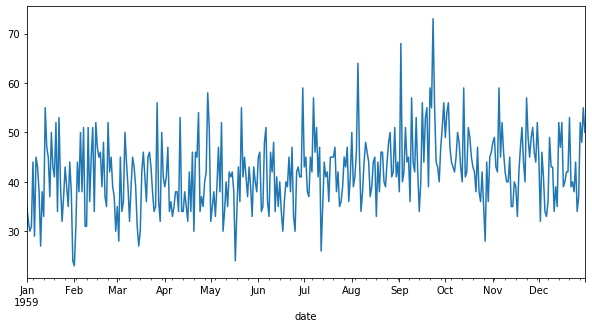

In [132]:
f_birth.plot(figsize = (10,5))

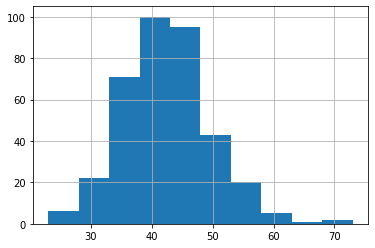

In [133]:
f_birth.hist() # little bit skew towards right tail

In [134]:
# checking for constant mean and variance
# for stationary time series mean and variance should remain same
f_birth1 = f_birth[0:201]
f_birth2 = f_birth[201:]
f_birth2.tail()

date
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, dtype: int64

In [135]:
f_birth1.mean()

40.024875621890544

In [136]:
f_birth2.mean()

44.3780487804878

In [137]:
f_birth1.var()

49.31437810945274

In [138]:
f_birth2.var()

49.57399371539728

In [139]:
# Dickey Fuller test or Augmented Dickey Fuller test
# It tells how strongly a time series is defined by a trend
# tells series is stationary or not using Null hypothesis

In [140]:
from statsmodels.tsa.stattools import adfuller

In [141]:
adf_test = adfuller(f_birth) #adfuller uses series instead of dataframe

In [142]:
adf_test[0] # Dickey fuller test value, lesser the score better the model

-4.808291253559763

In [143]:
adf_test[1] 
# It is the p-value which we use to compare to (0.05) in order to decide whether to reject null hypothesis or not
# In this case it is 0.000052434.... which is very less compared to 0.05
# Therefore series is stationary to perform the time series analysis

5.243412990149865e-05

# Making a function to calculate and show the statistics of dickey fuller test

In [144]:
def adf_test(dataset):
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    from statsmodels.tsa.stattools import adfuller
    ds = pd.read_csv(dataset,index_col=[0],parse_dates=[0],nrows =365,squeeze=True) 
    #assuming dataset has the index column as dates and has a data for 365 days
    print(ds.hist())
    ds_split = int(len(ds)/2)
    ds_1 = ds[0:ds_split]
    ds_2 = ds[ds_split:]
    print('Mean 1 = ',ds_1.mean())
    print('Mean 2 = ',ds_2.mean())
    print('Variance 1 = ',ds_1.var())
    print('Variance 2 = ',ds_2.var())
    adftest = adfuller(ds)
    print('ADF value = ',adftest[0])
    print('p Value = ',adftest[1])

AxesSubplot(0.125,0.125;0.775x0.755)
Mean 1 =  39.76373626373626
Mean 2 =  44.185792349726775
Variance 1 =  49.48530751016939
Variance 2 =  48.97628055005103
ADF value =  -4.808291253559763
p Value =  5.243412990149865e-05


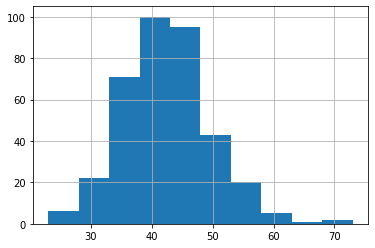

In [145]:
adf_test("C:\\Users\\sameer\\Desktop\\Datasets\\daily-total-female-births-CA.csv")

# Hyperparameters Tuning

In [119]:
# In this section we need to tune the order in the ARIMA model we provided to get the lowest aci value for best model (p,d,q)

In [120]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [125]:
f_birth = pd.read_csv("C:\\Users\\sameer\\Desktop\\Datasets\\daily-total-female-births-CA.csv",index_col=[0],parse_dates=[0],squeeze = True)
f_birth.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

In [126]:
p_values = range(0,8)
d_values = range(0,3)
q_values = range(0,5)

In [127]:
p_values

range(0, 8)

In [124]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q) # order in ARIMA
            train,test = f_birth[0:300], f_birth[300:365] # train test split
            predictions = list() # list to store the predicted values that we will compare later with test values
            for i in range(len(test)): # for each value of test value we want to have a value of predicted value
                try:
                    model = ARIMA(train,order)
                    model_fit = model.fit(disp=0) # displacement = 0 or FALSE turns off all the noise
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test,predictions)
                    print('ARIMA%s , MSE = %.2f'%(order,error))
                except:
                    continue